The goal of this notebook is to take our dataset and create a zip containing the images and a csv file containing the labels in relation to the images. The labels are 4 numbers for bounding boxes.

The zip is then to be sent to google drive from where we will be able to use it inside our google colab notebook.

In [3]:
from os import path, walk
from matplotlib import pyplot as plt
from matplotlib import patches
import random as rd
from tqdm import tqdm
import pandas as pd

%run '../alprLib/PlateBoundingBox.py'

In [6]:
DATASET_PATH = "../archive"
ANNOTATIONS_PATH = path.join(DATASET_PATH, "annotations")
IMAGES_PATH = path.join(DATASET_PATH, "images")

Image shape: (720, 1079, 4)


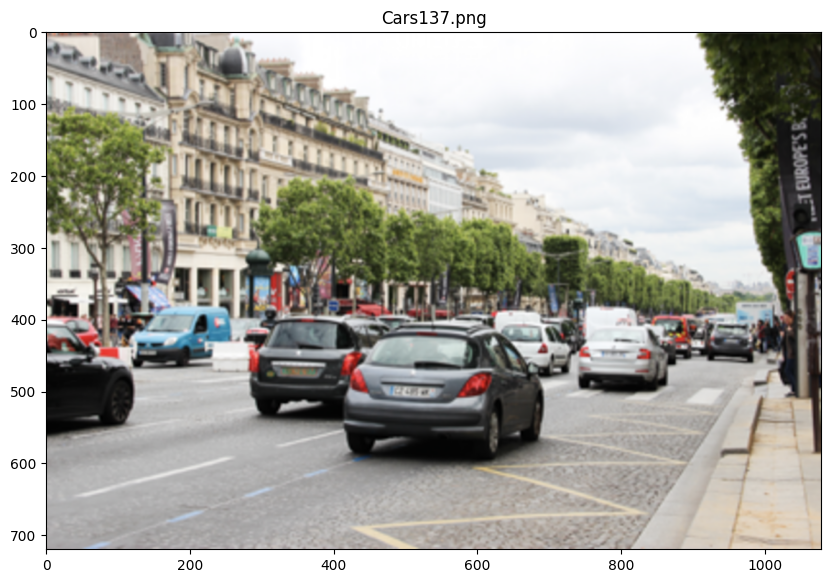

In [7]:
image_filenames = list(walk(IMAGES_PATH))
image_filename = rd.choice(image_filenames[0][2])
image_path = path.join(image_filenames[0][0], image_filename)
img = plt.imread(image_path)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title(image_filename)
ax.imshow(img)
print('Image shape: {}'.format(img.shape))

In [ ]:
annotation = image_filename.split('.')[0] + '.xml'
annotation_path = path.join(ANNOTATIONS_PATH, annotation)
print('Annotation path: {}'.format(annotation_path))

with open(annotation_path, 'r') as f:
    print(f.read())

Annotation path: ./archive/annotations/Cars377.xml

<annotation>
    <folder>images</folder>
    <filename>Cars377.png</filename>
    <size>
        <width>400</width>
        <height>225</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>licence</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>177</xmin>
            <ymin>138</ymin>
            <xmax>216</xmax>
            <ymax>161</ymax>
        </bndbox>
    </object>
</annotation>


In [ ]:
plate = PlateBoundingBox(xml_path=annotation_path)
plate.describe()

PlateBoundingBox
xml_path: ./archive/annotations/Cars377.xml
image_name: Cars377.png
image_width: 400
image_height: 225
xmin: 177
ymin: 138
xmax: 216
ymax: 161
width: 39
height: 23
center: (196.5, 149.5)
area: 897



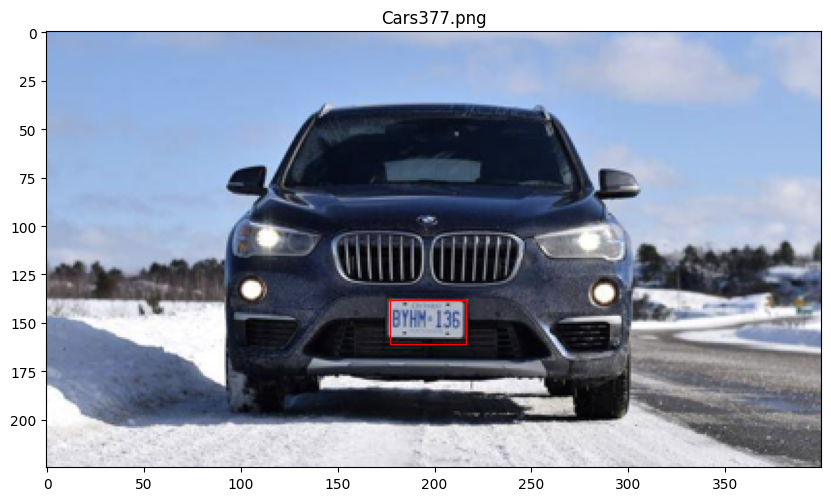

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title(image_filename)
ax.imshow(img)
rect = patches.Rectangle((plate.xmin, plate.ymin), plate.width, plate.height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

In [ ]:
# create a dataframe that holds the bounding box information for each image
df = pd.DataFrame(columns=['filename', 'w', 'h', 'xc', 'yc'])
for filename in tqdm(image_filenames[0][2]):
    annotation = filename.split('.')[0] + '.xml'
    annotation_path = path.join(ANNOTATIONS_PATH, annotation)
    plate = PlateBoundingBox(xml_path=annotation_path)
    new_row = pd.DataFrame({
        'filename': filename, 
        'w': plate.width01,
        'h': plate.height01,
        'xc': plate.center01[0],
        'yc': plate.center01[1],
    }, index=[0])
    df = pd.concat([df, new_row], ignore_index=True)

df.head()

100%|██████████| 429/429 [00:00<00:00, 2286.00it/s]


,filename,w,h,xc,yc
0,Cars84.png,0.177500,0.063333,0.506250,0.701667
1,Cars405.png,0.098976,0.075529,0.460751,0.663142
2,Cars356.png,0.223636,0.160763,0.550000,0.668937
3,Cars167.png,0.302000,0.077500,0.503000,0.673750
4,Cars103.png,0.045000,0.025510,0.597500,0.670918


In [ ]:
# zip ./archive/images with the dataframe exported as csv

# export the dataframe as csv
df.to_csv('labels.csv', index=False)

# zip the images and the csv file (make sure all files are copied to the root of the zip file)
!zip -j dataset.zip ./archive/images_resized/* labels.csv

# remove the csv file
!rm labels.csv

  adding: Cars0.png (deflated 0%)
  adding: Cars100.png (deflated 0%)
  adding: Cars102.png (deflated 0%)
  adding: Cars103.png (deflated 0%)
  adding: Cars104.png (deflated 0%)
  adding: Cars105.png (deflated 0%)
  adding: Cars106.png (deflated 0%)
  adding: Cars107.png (deflated 0%)
  adding: Cars108.png (deflated 0%)
  adding: Cars109.png (deflated 0%)
  adding: Cars110.png (deflated 0%)
  adding: Cars111.png (deflated 0%)
  adding: Cars112.png (deflated 0%)
  adding: Cars113.png (deflated 0%)
  adding: Cars114.png (deflated 0%)
  adding: Cars115.png (deflated 0%)
  adding: Cars116.png (deflated 0%)
  adding: Cars117.png (deflated 0%)
  adding: Cars118.png (deflated 0%)
  adding: Cars119.png (deflated 0%)
  adding: Cars11.png (deflated 0%)
  adding: Cars120.png (deflated 0%)
  adding: Cars121.png (deflated 0%)
  adding: Cars122.png (deflated 0%)
  adding: Cars123.png (deflated 0%)
  adding: Cars124.png (deflated 0%)
  adding: Cars125.png (deflated 0%)
  adding: Cars126.png (deflated